## **Salary Prediction**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Salary_Data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


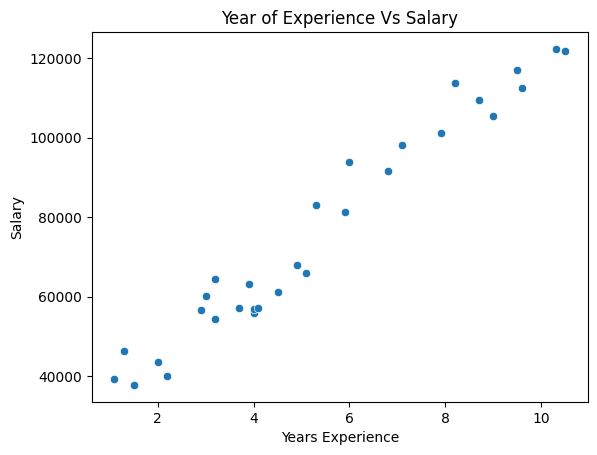

In [8]:
sns.scatterplot(df , x='YearsExperience', y='Salary')
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Year of Experience Vs Salary")
plt.show()

- This graph shows that as the Year of Experience Increases, the salary of the Employee Increases

In [9]:
x = df[['YearsExperience']]
y = df.drop(['YearsExperience'] , axis = 1)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
y_scaled = scaler.fit_transform(y)

In [13]:
y_scaled

array([[-1.36011263],
       [-1.10552744],
       [-1.419919  ],
       [-1.20495739],
       [-1.33978143],
       [-0.71830716],
       [-0.58815781],
       [-0.79981746],
       [-0.42881019],
       [-0.69801306],
       [-0.47433279],
       [-0.74976858],
       [-0.70662043],
       [-0.70201994],
       [-0.55250402],
       [-0.29921736],
       [-0.37004264],
       [ 0.26285865],
       [ 0.19885989],
       [ 0.66547573],
       [ 0.58377993],
       [ 0.82623317],
       [ 0.93861127],
       [ 1.40274136],
       [ 1.24020308],
       [ 1.09740238],
       [ 1.51986835],
       [ 1.3590738 ],
       [ 1.72102849],
       [ 1.70177321]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 0)

In [16]:
print("X_train Shape :", x_train.shape)
print("Y_train Shape :", y_train.shape)
print("X_test Shape :", x_test.shape)
print("Y_test Shape :", y_test.shape)

X_train Shape : (22, 1)
Y_train Shape : (22, 1)
X_test Shape : (8, 1)
Y_test Shape : (8, 1)


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()

In [19]:
reg.fit(x_train , y_train)

LinearRegression()

In [20]:
m = reg.coef_
c = reg.intercept_

In [21]:
m

array([[9379.71049195]])

In [22]:
c

array([26986.69131674])

In [23]:
# Predict Salary
y_pred = reg.predict(x_test)

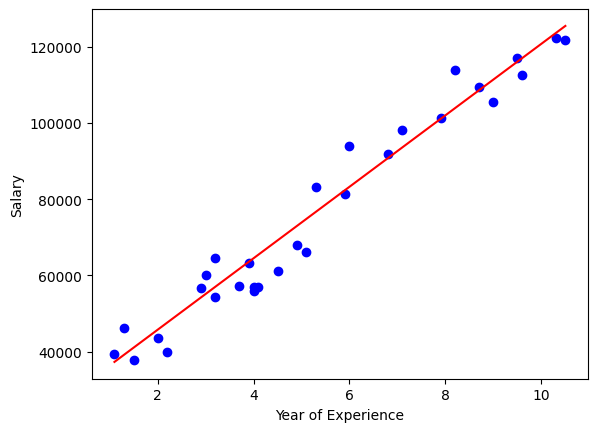

In [24]:
plt.scatter(x , y , color = 'Blue')
plt.plot(x , x * m + c, color = 'Red')
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()

In [29]:
from sklearn.metrics import r2_score , mean_squared_error
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", rmse)
print("r2 Score :",r2_score(y_test,y_pred))

Mean Squared Error : 22407940.143340684
Root Mean Squared Error: 4733.70258289858
r2 Score : 0.9779208335417602


In [26]:
YsE = 8
salary = m * YsE + c

In [27]:
print("Salary will be %.2f" % salary)

Salary will be 102024.38
